In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

datos = pd.read_csv("avocado.csv")

In [2]:
flotantes = datos.select_dtypes(include = ["float"])
flotantes.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [3]:
objetos = datos.select_dtypes(include = ["object"])
objetos.describe()

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


In [4]:
enteros = datos.select_dtypes(include = ["int"])
enteros.describe()

,Unnamed: 0,year
count,18249.000000,18249.000000
mean,24.232232,2016.147899
std,15.481045,0.939938
min,0.000000,2015.000000
25%,10.000000,2015.000000
50%,24.000000,2016.000000
75%,38.000000,2017.000000
max,52.000000,2018.000000


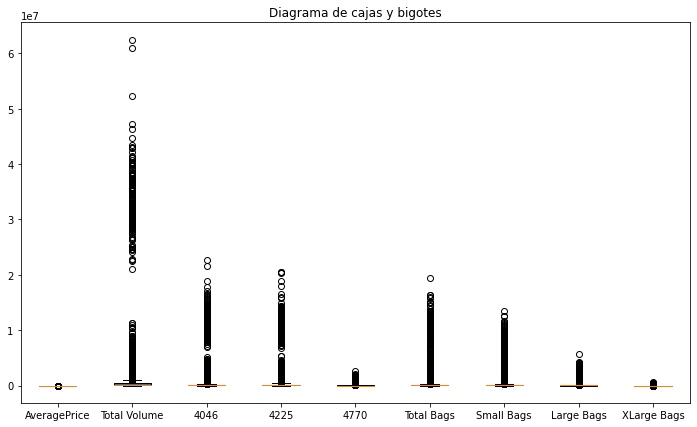

In [5]:
fig = plt.figure(figsize = (12,7))
plt.boxplot(flotantes, labels = flotantes.columns, patch_artist = True)
plt.title("Diagrama de cajas y bigotes")
plt.show()

<AxesSubplot:xlabel='AveragePrice'>

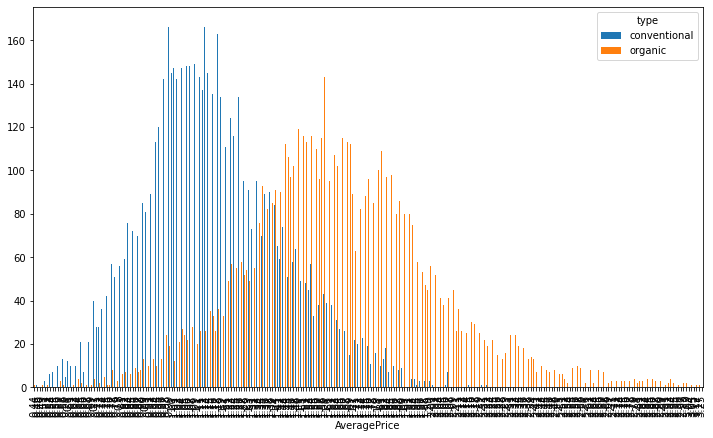

In [4]:
datos.groupby(datos.AveragePrice)['type']\
.value_counts()\
.unstack(1)\
.plot(kind = 'bar', stacked = False , figsize = (12,7))

<AxesSubplot:xlabel='year'>

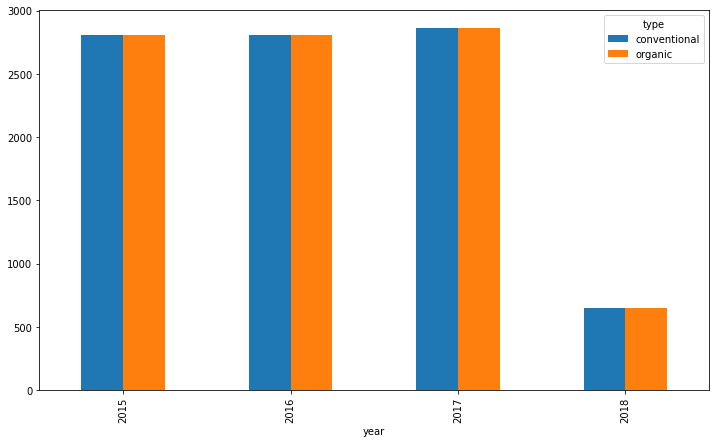

In [7]:
datos.groupby(datos.year)['type']\
.value_counts()\
.unstack(1)\
.plot(kind = 'bar', stacked = False, figsize = (12,7))

In [41]:
datos2 = datos.drop(["Unnamed: 0"], axis = 1)
datos2.corr(method = "pearson")

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

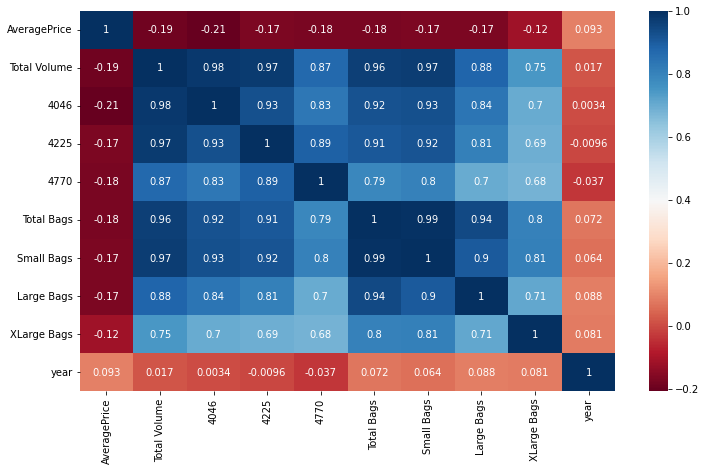

In [42]:
fig = plt.figure(figsize = (12,7))
sb.heatmap(datos2.corr(), cmap = "RdBu", annot = True)